shows a flower image with both the foreground and background are in focus.
(a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and
background image.


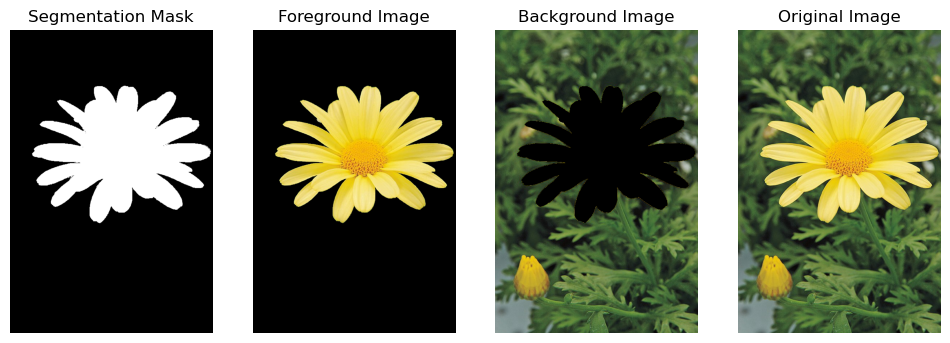

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image
img = cv.imread("images/en3160_assignment_01_Page_4_Image_0001.jpg")

# Create a mask initialized with zeros
mask = np.zeros(img.shape[:2], np.uint8)

# Define a rectangle that contains the object of interest (flower)
rectangle = (50, 50, 505, 505)  # (x, y, width, height)

# Apply GrabCut algorithm with rectangle initialization
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)
cv.grabCut(img, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)

# Create a binary mask where the probable background and definite background are set to 0
mask1 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
foreground_img = img * mask1[:, :, np.newaxis]

# Apply GrabCut algorithm with mask initialization
cv.grabCut(img, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_MASK)

# Create a binary mask where the probable foreground and definite foreground are set to 0
mask2 = np.where((mask == 3) | (mask == 1), 0, 1).astype('uint8')
background_img = img * mask2[:, :, np.newaxis]

# Display the images
fig, ax = plt.subplots(1, 4, figsize=(12, 12))
ax[0].imshow(mask1, cmap='gray')
ax[0].set_title("Segmentation Mask")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground Image")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(background_img, cv.COLOR_BGR2RGB))
ax[2].set_title("Background Image")
ax[2].axis("off")

ax[3].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[3].set_title("Original Image")
ax[3].axis("off")
plt.savefig('Q91.png')



(b) Produce an enhanced image with a substantially blurred background. Display the original image
alongside the enhanced image.


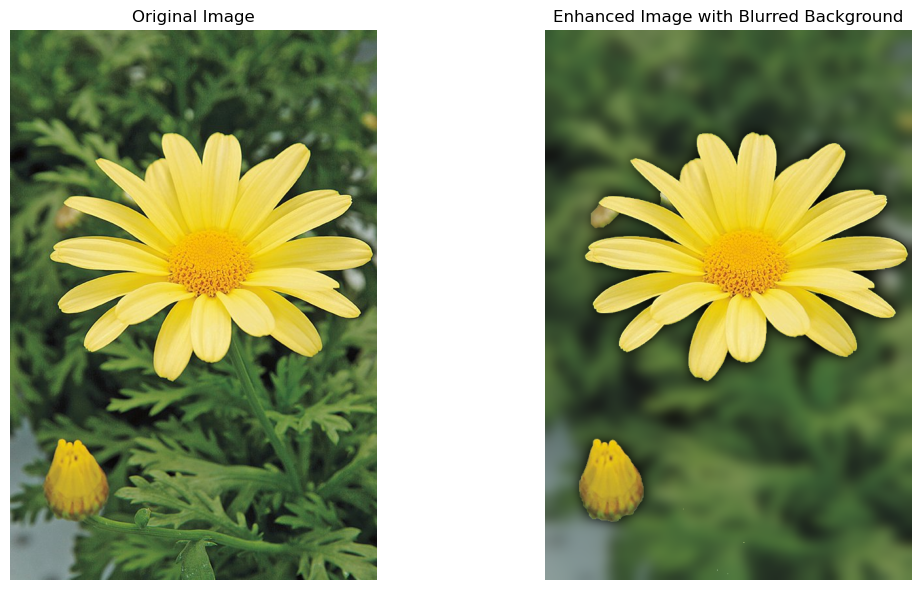

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image
image = cv.imread("images/en3160_assignment_01_Page_4_Image_0001.jpg")

# Create a mask initialized with zeros
mask = np.zeros(image.shape[:2], np.uint8)

# Define a rectangle that contains the object of interest (flower)
rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)

# Apply GrabCut algorithm with rectangle initialization
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Modify the mask to get a binary mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
mask3 = 1 - mask2

# Apply the mask to get segmented images
foreground_img = image * mask2[:, :, np.newaxis]
background_img = image * mask3[:, :, np.newaxis]

# Create a blurred background
blurred_background = cv.GaussianBlur(background_img, (0, 0), sigmaX=10, sigmaY=10)
blurred_background = blurred_background * mask3[:, :, np.newaxis]

# Replace the background in the segmented image
enhanced_img = foreground_img + blurred_background

# Display the original and enhanced images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv.cvtColor(enhanced_img.astype(np.uint8), cv.COLOR_BGR2RGB))
axes[1].set_title("Enhanced Image with Blurred Background")
axes[1].axis("off")
plt.savefig('Q92.png')
plt.tight_layout()
plt.show()


(c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?

 The background just beyond the edge of the flower is quite dark in the enhanced image due to the Gaussian blur applied to the background. The blurring process causes the background pixels to blend together and become darker, creating a smoother transition between the sharp flower and the blurred background. The darkening effect is a result of the weighted average of pixel values caused by the blurring operation.